In [6]:
from util import *
from swarm import *
from metrics import *
import random
import time
from IPython import display
import pylab as pl

In [7]:
import yal

modules = yal.read('./yal_files/ami33.yal')

participants = yal.util.as_participants(modules)

#participants

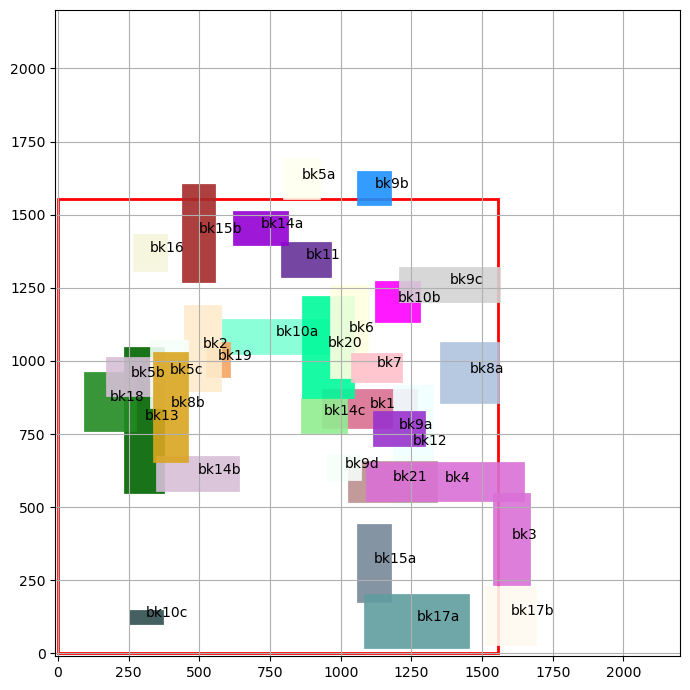

In [8]:
layout_zone = {"xmin"   : 0,
               "ymin"   : 0,
               "width"  : 1555,
               "height" : 1555}

conciliation_quota  = 0.5

critical_amount     = 100

p   = random_place_mcnc(participants, layout_zone, 666)

a = plot_participants(layout_zone, p, 2200, 2200)

In [9]:
participants            = determine_initial_conditions(p, layout_zone, conciliation_quota, critical_amount)


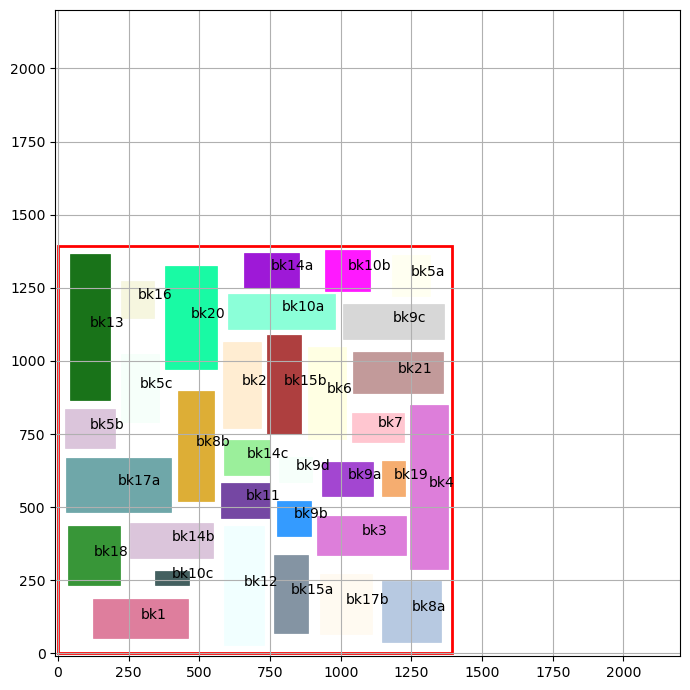

{'bk1': 'center', 'bk10a': 'center', 'bk10b': 'center', 'bk10c': 'center', 'bk11': 'center', 'bk12': 'center', 'bk13': 'center', 'bk14a': 'center', 'bk14b': 'center', 'bk14c': 'center', 'bk15a': 'center', 'bk15b': 'center', 'bk16': 'center', 'bk17a': 'center', 'bk17b': 'center', 'bk18': 'center', 'bk19': 'center', 'bk2': 'center', 'bk20': 'center', 'bk21': 'center', 'bk3': 'center', 'bk4': 'center', 'bk5a': 'center', 'bk5b': 'center', 'bk5c': 'center', 'bk6': 'center', 'bk7': 'center', 'bk8a': 'center', 'bk8b': 'center', 'bk9a': 'center', 'bk9b': 'center', 'bk9c': 'center', 'bk9d': 'center'}


In [10]:
while True:

    participants    = one_round_of_interaction(participants, layout_zone, 'interference', conciliation_quota, critical_amount)

    plot_participants(layout_zone, participants, 2200, 2200)

    last_moves = {key : value['last-move'] for key,value in participants.items()}

    moves = list(last_moves.values())

    print(last_moves)

    if moves.count('center') == len(participants):

        ds = calculate_dead_space(participants, layout_zone)  

        print('Current deadspace : ' + str(ds) + ' %') 

        if ds < 10:
            break
        
        else:
            layout_zone         = scale_layout_zone(layout_zone, 0.99)

            participants        = reset_after_tightening(participants)



    # Minimum distance to large!